In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<b><font color="red" size="6">ch12. 데이터 프레임과 시리즈(Pandas)</font></b>
- pip install pandas

# 1절. 판다스 패키지
- 데이터 분석을 위해 반드시 알아야할 패키지. 넘파이를 기반으로 하며, 다른 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터 프레임을 제공
- 판다스 장점 : 데이터 프레임 생성, 파일io, 레이블링, 부분데이터추출,
           크기변경(행이나 열삽입, 삭제), 데이터 분할, 병합, 데이터 정렬
           결측치 처리, 피벗과 언피벗등에 용이
- https://pypi.org/project/pandas/ (package index)
- https://pandas.pydata.org/docs/reference/index.html#api (API reference)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [3]:
data = pd.read_json('data/ch09_member1.json', encoding='cp949') # encoding기본값:utf-8
display(data)
print(type(data))

,name,age,email,address
0,홍길동,20,h@h.com,서울
1,김길동,30,k@h.com,부산
2,신길동,40,s@h.com,안양


<class 'pandas.core.frame.DataFrame'>


In [4]:
member4 = pd.read_csv('data/ch09_member4.csv')
member4.head() # 최초 상위 5행 가져오기

,name,age,email,address
0,홍길동,20,h@hong.com,서울
1,신길동,25,s@hong.com,부산
2,김길동,35,k@hong.com,인천
3,홍길동,20,h@hong.com,서울
4,신길동,25,s@hong.com,부산


In [5]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None,
                     names=['name','age','email','address'])
member1

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


In [6]:
iris = pd.read_hdf('data/ch09_iris2.hdf5', key='iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 2절. 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [7]:
# value가 list인 딕셔너리를 데이터프레임으로
d = {'kor': [100,90], 'mat':[95,99]}
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [8]:
df.to_dict() # 데이터 프레임을 딕셔너리로

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [9]:
df.to_numpy() # 데이터프레임을 넘파이배열

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [10]:
# 딕셔너리 리스트를 데이터프레임으로
d = [{'kor':100, 'mat':95}, {'kor':90, 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [11]:
df.dtypes

kor    int64
mat    int64
dtype: object

In [12]:
df.info() # ★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [16]:
df.dtypes.to_dict()

{'kor': dtype('int64'), 'mat': dtype('int64')}

In [18]:
df['kor'].dtype

dtype('int64')

In [21]:
import numpy as np
df['kor'] = df['kor'].astype(np.float64)

0    100.0
1     90.0
Name: kor, dtype: float64

In [22]:
d = [{'kor':100, 'mat':100}, {'kor':90, 'mat':99}, {'kor':83,'eng':85}]
df = pd.DataFrame(data= d)
df

,kor,mat,eng
0,100,100.0,NaN
1,90,99.0,NaN
2,83,NaN,85.0


In [23]:
type(np.nan)

float

In [25]:
# 결측치는 int로 형변환 불가(결측치를 대체값으로 치환 후 변환)df['mat'].astype(np.int32)

## 2.2 리스트를 이용해서 데이터 프레임 만들기

In [26]:
kor = [100,90,95,90,65]
mat = [100,95,94,64,85]
df = pd.DataFrame({'kor': kor, 'mat':mat})
df

,kor,mat
0,100,100
1,90,95
2,95,94
3,90,64
4,65,85


In [27]:
np.c_[kor, mat]

array([[100, 100],
       [ 90,  95],
       [ 95,  94],
       [ 90,  64],
       [ 65,  85]])

In [30]:
df = pd.DataFrame(np.c_[kor, mat], columns=['국어','수학'])
df

,국어,수학
0,100,100
1,90,95
2,95,94
3,90,64
4,65,85


In [32]:
l = [[100,90],[10,20]]
df = pd.DataFrame(l, columns=['kor','mat'])
df

,kor,mat
0,100,90
1,10,20


In [36]:
%ls D:\ai\Downloads\shareData\상가정보

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2D0E-15FE

 D:\ai\Downloads\shareData\상가정보 디렉터리

2024-11-18  오후 04:19    <DIR>          .
2024-11-18  오후 04:19    <DIR>          ..
2024-10-23  오후 05:59             1,011 [필독]파일열람방법.txt
2024-10-23  오후 06:19        53,454,658 소상공인시장진흥공단_상가(상권)정보_강원_202409.csv
2024-10-23  오후 06:19       301,935,950 소상공인시장진흥공단_상가(상권)정보_경기_202409.csv
2024-10-23  오후 06:20        86,291,699 소상공인시장진흥공단_상가(상권)정보_경남_202409.csv
2024-10-23  오후 06:20        70,952,897 소상공인시장진흥공단_상가(상권)정보_경북_202409.csv
2024-10-23  오후 06:20        36,458,714 소상공인시장진흥공단_상가(상권)정보_광주_202409.csv
2024-10-23  오후 06:20        57,391,847 소상공인시장진흥공단_상가(상권)정보_대구_202409.csv
2024-10-23  오후 06:20        36,638,904 소상공인시장진흥공단_상가(상권)정보_대전_202409.csv
2024-10-23  오후 06:20        78,253,942 소상공인시장진흥공단_상가(상권)정보_부산_202409.csv
2024-10-23  오후 06:18       254,255,270 소상공인시장진흥공단_상가(상권)정보_서울_202409.csv
2024-10-23  오후 06:18         8,277,492 소상공인시장진흥공단_상가(상권)정보_세종_202409.csv
2024-10-23  오후 06:18        26,299,042 소상공인시장진흥공단

In [39]:
df = pd.read_csv(r'D:\ai\Downloads\shareData\상가정보\소상공인시장진흥공단_상가(상권)정보_세종_202409.csv', 
                encoding='utf-8', sep=',', # 기본값 생략가능
                low_memory=False, # 데이터 용량이 클 경우만 기입
                nrows=30) # 처음 30행만 가져오기
df.shape

(30, 39)

In [43]:
df.head(1) # 상위 1행만 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084499,베트남쌀국수퍼짱,NaN,I2,음식,I205,동남아시아,I20501,베트남식 전문,I56194,...,3611010700103610086000001,모닝시티2,세종특별자치시 세종특별자치시 한누리대로 311,339003.0,30123,NaN,1.0,NaN,127.25584,36.492065


In [44]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns = 39 # 39열까지 display 가능
pd.options.display.max_rows = 40    # 40행까지 display 가능
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084499,베트남쌀국수퍼짱,NaN,I2,음식,I205,동남아시아,I20501,베트남식 전문,I56194,김밥 및 기타 간이 음식점업,36,세종특별자치시,36110,세종특별자치시,36110518,나성동,3611010700,나성동,3611010700107320000,1,대지,732,NaN,세종특별자치시 세종특별자치시 나성동 732,361102000002,세종특별자치시 세종특별자치시 한누리대로,311,NaN,3611010700103610086000001,모닝시티2,세종특별자치시 세종특별자치시 한누리대로 311,339003.0,30123,NaN,1.0,NaN,127.25584,36.492065


In [45]:
df.head(1).T

,0
상가업소번호,MA0101202210A0084499
상호명,베트남쌀국수퍼짱
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I205
상권업종중분류명,동남아시아
상권업종소분류코드,I20501
상권업종소분류명,베트남식 전문
표준산업분류코드,I56194


## 2.3 read_csv

In [47]:
# (1) CSV 파일 불러오기(기본값)
member = pd.read_csv('data/ch12_member.csv'
                     # , encoding='utf-8', sep=',' # 기본값
                    )
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [48]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [50]:
# 문자로 읽어들인 Birth를 datetime형으로
# 형변환은 astype()쓰지만 datetime형으로 변환할 때는 to_datetime()함수를 사용
member['Birth'] = pd.to_datetime(member['Birth'])
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [52]:
import numpy as np
member['Age'] = member['Age'].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [57]:
#(2) 특정행 제외하고 csv파일 읽어오기
member = pd.read_csv('data/ch12_membercp949.csv', encoding='cp949',
                    skiprows=[1,6]) # 1,6번째 행 제외하고 읽어오기(시작이 1부터)
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [61]:
# (3) 상위몇행만 csv 파일 읽어오기
member_df = pd.read_csv('data/ch12_membersep.csv', sep='|', nrows=5) # 상위5행만 읽어오기
member_df

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [65]:
# 주석제외, datetime형 필드 지정하여 읽어오기
member_df = pd.read_csv('data/ch12_membertab.csv', sep='\t',
                       comment='#', # #이 있는 행은 제외하고 읽어오기
                       parse_dates=['Birth']) # datetime형으로 읽어올 필드 지정
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


## iris 데이터 가져오기 방법1 : sklearn(머신러닝패키지)
## iris 데이터 가져오기 방법2 : statsmodels (R데이터 가져오기)
## iris 데이터 가져오기 방법3 : seaborn(시각화 패키지)

## 2.4 sklearn.datasets 모듈 데이터(iris)를 데이터 프레임으로 변환

In [66]:
from sklearn import datasets
# import sklearn.datasets as datasets
# sklearn 패키지는 머신러닝을 공부하기 위한,  학습 데이터셋들을 제공
# sklearn 패키지에서 제공되는 데이터셋들은 딕셔너리 형식으로 제공
iris = datasets.load_iris()
iris # 딕셔너리 형태

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [68]:
print(iris.DESCR) # iris 데이터 셋에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [71]:
iris.data # 독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [73]:
iris.feature_names # 독립변수의 열이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [82]:
# 데이터 프레임에서 열이름
[col[:-4].strip().replace(' ','_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [88]:
# 데이터 프레임에서 열이름
[col[:12].strip().replace(' ', '_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [89]:
iris.target
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
iris.target_names
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [95]:
# 데이터 프레임의 가장 오른쪽 열
iris.target_names[iris.target]
iris['target_names'][iris['target']]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [97]:
# 독립변수
data = iris.data
print(data[:5])
# 종속변수
target = iris.target_names[iris.target].reshape(-1, 1)
print(target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]


In [98]:
print('독립변수 차원 :', data.shape)
print('종속변수 차원 :', target.shape)

독립변수 차원 : (150, 4)
종속변수 차원 : (150, 1)


In [102]:
# ⓐ 독립변수와 종속변수를 stack한 후, 데이터프레임으로 완성
pd.DataFrame(np.hstack( (data, target)), 
             columns=[col[:12].strip().replace(' ', '_') for col in iris.feature_names]+
                    ['spacies'])

,sepal_length,sepal_width,petal_length,petal_width,spacies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
df = pd.DataFrame(np.hstack( (data, target)), 
             columns=iris.feature_names + ['spacies'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spacies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
df.spacies  # df['spacies']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: spacies, Length: 150, dtype: object

In [110]:
df['sepal length (cm)']
# df.sepal length (cm) 열이름에 space나 특수문자의 경우 . 열접근이 불가

SyntaxError: invalid syntax (98944228.py, line 2)

In [112]:
# ⓑ 독립변수, 종속변수를 따로 데이터프레임으로 만들고 두 데이터 프레임을 연결
# X : 독립변수 데이터프레임
X = pd.DataFrame(iris.data, columns=iris.feature_names) 
X.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [120]:
X.columns = [col[:12].strip().replace(' ','_') for col in iris.feature_names]

In [122]:
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [123]:
# y: 종속변수 데이터 프레임
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [125]:
print(X.index) # index : 행이름
print(y.index)

RangeIndex(start=0, stop=150, step=1)
RangeIndex(start=0, stop=150, step=1)


In [129]:
# 데이터 프레임 연결하기 (열로 연결)
iris_df = pd.concat( [X, y], axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [130]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2.5 statsmodels 패키지의 iris

In [131]:
# iris 데이터 가져오기 방법2 : R 데이터 가져오기
import statsmodels.api as sm
iris_data = sm.datasets.get_rdataset('iris',
                                    package='datasets',
                                    cache=True)
iris_data

<class 'statsmodels.datasets.utils.Dataset'>

In [133]:
iris = iris_data.data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
iris['Sepal.Length']
# iris.Sepal.Length 열이름에 .이 있으면 iris.Sepal.Length로 접근 불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [143]:
[col.lower().replace('.','_') for col in iris.columns]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [144]:
iris.columns = [col.replace('.', '') for col in iris.columns]
iris.head(1)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa


## 2.6 seaborn 패키지의 iris

In [145]:
# iris 데이터 가져오기 방법3 : seaborn
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [149]:
# 데이터 프레임을 파일로 출력
iris.to_csv('data/ch12_iris.csv', # 4K
           sep=',', mode='w', encoding='utf-8', # 기본값
           index=False) # 행이름 생략되서 파일 출력

In [150]:
iris.to_csv('data/ch12_iris.csv.gz', # 1K
           index=False,
           compression='infer')

In [151]:
read_iris = pd.read_csv('data/ch12_iris.csv.gz', compression='infer')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3절. 이름(열, 행) 지정하기
## 3.1 열이름 지정하기

In [190]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [191]:
member.columns

Index(['Name', 'Age', 'Email', 'Address', 'Birth'], dtype='object')

In [192]:
member.columns = ['이름','나이','메일','주소','생년월일']
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정

In [193]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [194]:
member.index = range(10,15)
member

,이름,나이,메일,주소,생년월일
10,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
11,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
12,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
13,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
14,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [195]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [196]:
member['이름']['서']

'홍길서'

In [197]:
member.loc['서','이름'] # loc:행이름과 열이름으로 데이터 프레임의 부분 데이터 조회

'홍길서'

In [198]:
# 이름을 행이름으로 (실행결과가 출력되서 나오면 return될 뿐, member는 안 바뀜)
# member를 수정하려면 (1) 할당 (2) inplace 매개변수에 True(기본값은 False)
member1 = member.set_index('이름') 
member1

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [199]:
member.set_index('이름', inplace=True)

In [200]:
member

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [201]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [202]:
# 인덱스를 컬럼에 편입시키기
member.reset_index(inplace=True)

In [206]:
member.index = [0, 11, 3, 4, 5]
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
11,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
3,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
4,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
5,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [208]:
# 기존 index를 새로운 열에 편입시키지 않고 완전히 제거 후 숫자 index로 초기화
member.reset_index(drop=True, inplace=True)
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [209]:
member.loc[2, '생년월일']

'1999-11-01'

In [210]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      5 non-null      object
 1   나이      5 non-null      int64 
 2   메일      5 non-null      object
 3   주소      5 non-null      object
 4   생년월일    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [211]:
member = pd.read_csv('data/ch12_member.csv', comment='#', parse_dates=['Birth'])
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


In [212]:
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [215]:
member.loc[0,'Birth']

Timestamp('1999-01-01 00:00:00')

In [216]:
# 시리즈.dt : datetime열에서 날짜 및 시간에 관련된 정보를 추출하기 위해 사용
member['Birth'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: Birth, dtype: int64

In [217]:
member['Birth'].dt.month

0     1
1    12
2    11
3     5
4     1
Name: Birth, dtype: int64

In [218]:
member['Birth'].dt.weekday # 0월, 1화... 6:일

0    4
1    2
2    0
3    5
4    5
Name: Birth, dtype: int64

In [219]:
member['Birth'].dt.to_period('M')

0    1999-01
1    1999-12
2    1999-11
3    1999-05
4    1999-01
Name: Birth, dtype: period[M]

## 3.3 레벨 이름 지정하기

In [220]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [222]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                  ['이름','나이','메일','주소','생일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [224]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member

대분류  기본정보                        추가정보           
소분류    이름  나이             메일       주소         생일
좌우 동  홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
   서  홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하 남  홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
   북  홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
   중  홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [228]:
member.loc['좌우','기본정보']['나이']

동    20
서    30
Name: 나이, dtype: int64

In [230]:
member.loc['좌우','기본정보'].loc['동','나이']

20

In [7]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1) # 상위 1개

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [8]:
iris.columns = ['꽃받침길이','꽃받침너비','꽃잎길이','꽃잎너비','종']
iris.tail(1) # 끝 1개

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종
149,5.9,3.0,5.1,1.8,virginica


In [10]:
iris.index = range(150, 300)
iris.tail()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종
295,6.7,3.0,5.2,2.3,virginica
296,6.3,2.5,5.0,1.9,virginica
297,6.5,3.0,5.2,2.0,virginica
298,6.2,3.4,5.4,2.3,virginica
299,5.9,3.0,5.1,1.8,virginica


In [21]:
iris.columns = [['꽃받침','꽃받침', '꽃잎','꽃잎','종'],
                ['길이','너비',     '길이','너비','종']]
iris.columns.names = ['sps', '길이너비']
iris.loc[[150,200,250]]

sps   꽃받침        꽃잎                종
길이너비   길이   너비   길이   너비           종
150   5.1  3.5  1.4  0.2      setosa
200   7.0  3.2  4.7  1.4  versicolor
250   6.3  3.3  6.0  2.5   virginica

In [17]:
pd.options.display.max_rows = 150 # 커널 재시작시 원상 복귀

In [26]:
# setosa가 50개, versicolor가 50개, virginica가 50개
print(['setosa' for i in range(50)] + ['versicolor' for i in range(50)] + \
     ['virginica' for i in range(50)])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [54]:
iris.index = [['setosa' for i in range(50)] + 
              ['versicolor' for i in range(50)] + 
              ['virginica' for i in range(50)],
              list(range(50))+list(range(50))+list(range(50))]
iris.iloc[[0,25,50,75,100,125]]

sps            꽃받침        꽃잎                종
길이너비            길이   너비   길이   너비           종
setosa     0   5.1  3.5  1.4  0.2      setosa
           25  5.0  3.0  1.6  0.2      setosa
versicolor 0   7.0  3.2  4.7  1.4  versicolor
           25  6.6  3.0  4.4  1.4  versicolor
virginica  0   6.3  3.3  6.0  2.5   virginica
           25  7.2  3.2  6.0  1.8   virginica

In [ ]:
# 피벗테이블 이용시 피벗팅한 결과를 가져올 때 볼 수 있음

# 4절. 부분 데이터 조회

In [29]:
member = pd.read_csv('data/ch12_member.csv', comment='#', parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 단일 열조회

In [31]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [33]:
# member[0] # 행을 조회할 경우 에러

## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] ; 행이름, 열이름으로 조회, 
            * 행이름과 열이름 자리에 슬라이싱(from:to)은 from부터 to까지 (from,to포함)
            * 행이름과 열이름 자리에 list

In [37]:
member.loc[0:2] # 2행포함 , member.loc[0:2, ], member.loc[0:2, :]
# 모든 열을 다 출력할 경우 열 생략 가능

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [40]:
member.index = ['동','서','남','북','중']
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [41]:
# 동~남행까지, Name~Email열까지
member.loc['동':'남', 'Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [43]:
# 동행과 남행까지
member.loc[['동','남']]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [45]:
# 동행과 남행까지, Name열과 Email열까지
member.loc[['동','남'] , ['Name','Email']]

,Name,Email
동,홍길동,hong@hong.com
남,홍길남,nam@hong.com


In [47]:
member.loc['동','Name'], type(member.loc['동','Name'])

('홍길동', str)

In [49]:
member.loc['동'], type(member.loc['동']) # 한행의 결과 1차원 시리즈

(Name                       홍길동
 Age                         20
 Email            hong@hong.com
 Address                서울시 강동구
 Birth      1999-01-01 00:00:00
 Name: 동, dtype: object,
 pandas.core.series.Series)

In [50]:
member.loc[:, 'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

In [53]:
# member.loc['Name']
member['Name'], type(member['Name'])

(동    홍길동
 서    홍길서
 남    홍길남
 북    홍길북
 중    홍길중
 Name: Name, dtype: object,
 pandas.core.series.Series)

## 4.3 iloc을 이용한 조회
- df.iloc[행번호, 열번호]
    * 열번호 생략시 모든 열 조회
    * 행번호, 열번호 자리에 list, 슬라이싱 [from:stop:by] : from부터 stop앞까지 by씩

In [56]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [57]:
# 2번째~3번째행 (열번호 생략시 모든 열 출력)
member.iloc[2:4]

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [58]:
member.iloc[0] # 1차원 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [59]:
member.iloc[0,0]

'홍길동'

In [60]:
# 0번째~2번째행, 1번째~3번째 열
member.iloc[0:3, 1:4]

,Age,Email,Address
동,20,hong@hong.com,서울시 강동구
서,30,seo@hong.com,서울시 중구
남,21,nam@hong.com,서울시 강동구


In [63]:
# 짝수번째 행의 맨 마지막 열을 제외하고 출력
member.iloc[::2, 0:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [64]:
# 마지막행부터 처음행까지 꺼꾸로 출력
member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [65]:
# 0번째와2번째행, 1번째와3번째 열
member.iloc[[0,2],[1,3]]

,Age,Address
동,20,서울시 강동구
남,21,서울시 강동구


In [66]:
# 0번째 행의 0번째,3번째 열
member.iloc[0, [0,3]]

Name           홍길동
Address    서울시 강동구
Name: 동, dtype: object

## 4.4 조건으로 조회하기

In [68]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [70]:
member['Age']>=23

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [71]:
member.loc[[True,False,False,False,False], :]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [75]:
# 23세 이상의 데이터만 조회 (아래는 모두 동일한 결과)
member.loc[member['Age']>=23, :]
member.loc[member['Age']>=23]
member[member['Age']>=23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [78]:
# 23세 이상의 Name, Age, Email
member.loc[member['Age']>=23, 'Name':'Email']

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [79]:
# 23세 이상의 Name, Age,Address
member.loc[member['Age']>=23, ['Name', 'Age','Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [83]:
# ~ : 반대
member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [94]:
address = '서울시 관악구'
print(address.find('중구'))
print(address.startswith('서울시'))

-1
True


In [96]:
# member['Address'].find('중구') find함수는 문자열 함수라서 불가
# member['Address'].startswith('서울시')

**※ 시리즈에 문자함수를 쓰기 위해 참조 :**
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [98]:
member['Address'].str.find('중구')!=-1

동    False
서     True
남    False
북    False
중     True
Name: Address, dtype: bool

In [100]:
# Address가 중구 포함하는 데이터
member[member['Address'].str.find('중구')!=-1]
member.loc[member['Address'].str.find('중구')!=-1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [101]:
member[member['Address'].str.contains('중구')]
member.loc[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [102]:
# 중구 데이터의 Name, Address, Birth
member.loc[member['Address'].str.contains('중구'), ['Name','Address','Birth']]

,Name,Address,Birth
서,홍길서,서울시 중구,1999-12-01
중,홍길중,부산시 중구,1999-01-30


In [103]:
# Address가 서울로 시작하는 데이터
member[member['Address'].str.startswith('서울')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [104]:
# Address가 서울로 시작하지 않는 데이터
member[~member['Address'].str.startswith('서울')]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [110]:
# 이름이 '홍길동'이거나 '홍길남'인 데이터 모든 열
member[member['Name'].isin(['홍길동','홍길남'])]
member.loc[member['Name'].isin(['홍길동','홍길남'])]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [112]:
# 이름이 '홍길동'이거나 '홍길남'인 데이터 Address, Birth
member.loc[member['Name'].isin(['홍길동','홍길남']), 'Address':'Birth']

,Address,Birth
동,서울시 강동구,1999-01-01
남,서울시 강동구,1999-11-01


In [117]:
# 1월이 생일인 데이터
member.loc[member['Birth'].dt.month == 1]
member[member['Birth'].dt.month == 1]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [137]:
import numpy as np
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.loc[[0,3], 'Email'] = np.nan
member

,Name,Age,Email,Address,Birth
0,홍길동,20,NaN,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,NaN,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [138]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5 non-null      object
 1   Age      5 non-null      int64 
 2   Email    3 non-null      object
 3   Address  5 non-null      object
 4   Birth    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [139]:
member.isna() # 결측치 여부

,Name,Age,Email,Address,Birth
0,False,False,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,True,False,False
4,False,False,False,False,False


In [141]:
True + True, False+True

(2, 1)

In [142]:
member.isna().sum() # 각 열의 결측치 갯수

Name       0
Age        0
Email      2
Address    0
Birth      0
dtype: int64

In [148]:
# 조건 연산자를 이용해서 데이터 추출(조건2개)
data = pd.DataFrame({'eng':[100,80,90], 'mat':[100,90,60]})
data
# 영어80이상이고 수학이 80이상인 데이터 추출
data[ (data['eng']>=80) & (data['mat']>=80) ]

,eng,mat
0,100,100
1,80,90


## 부분데이터 조회하는 방법
- df[열이름] - 특정 열 모든행
- df[조건]   - 조건에 맞는 행 전체
- df.loc[행이름, 열이름] : 이름조회, 조건으로 조회가능
    * 열이름 생략하면 모든 열
    * 행이름과 열이름 자리에 list, 슬라이싱 가능
- df.iloc[행번호, 열번호] : 번호로 조회
    * 열번호 생략하면 모든 열
    * 행번호, 열번호 자리에 list, 슬라이싱 가능

In [151]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica


In [165]:
# 1. sepal_length 열만 출력
iris['sepal_length'], iris.sepal_length
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10, 'sepal_length':'petal_width']
iris.iloc[:11, :-1]
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_width'] ]  
iris.iloc[3:11, [0,2] ]  
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0,50,100]]
iris.iloc[0:101:50]

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[[0,25,50,75,100,125], 'petal_length':'petal_width']
iris.iloc[::25, 2:-1]

# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']
iris.loc[iris['species']=='versicolor']

# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'].head()
iris.loc[iris['species']=='setosa'].head()
iris.loc[iris['species']=='setosa'].iloc[:5]

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head()
iris.loc[iris['sepal_length']>=6.5].head()

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length'] >= 7.2, 'sepal_length':'petal_length']
iris[iris['sepal_length'] >= 7.2][['sepal_length','sepal_width','petal_length']]

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[ (iris['species']=='versicolor') & (iris['sepal_length']>6.5)]
import numpy as np
iris[np.logical_and(iris['species']=='versicolor',iris['sepal_length']>6.5 )]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [158]:
# 1. sepal_length 열만 출력
iris['sepal_length'], iris.sepal_length

0    5.1
Name: sepal_length, dtype: float64

In [167]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10, 'sepal_length':'petal_width']
iris.iloc[:11, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_width'] ]  
iris.iloc[3:11, [0,2] ]  

In [ ]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0,50,100]]
iris.iloc[0:101:50]

In [152]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[[0,25,50,75,100,125], 'petal_length':'petal_width']
iris.iloc[::25, 2:-1]

In [153]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']
iris.loc[iris['species']=='versicolor']

In [154]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'].head()
iris.loc[iris['species']=='setosa'].head()

In [155]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head()
iris.loc[iris['sepal_length']>=6.5].head()

In [172]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length'] >= 7.2, 'sepal_length':'petal_length']
iris[iris['sepal_length'] >= 7.2][['sepal_length', 'sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [174]:
import numpy as np

In [176]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[ (iris['species']=='versicolor') & (iris['sepal_length']>6.5)]

iris[np.logical_and(iris['species']=='versicolor', 
                    iris['sepal_length']>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5절. 데이터 추가 및 삭제
## 5.1 데이터 프레임의 요소 삭제
- df.drop(label, axis) : axis=0일 때는 행삭제, axis=1일 때는 열삭제
    * label : 행이름 또는 열이름

In [4]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [193]:
# 1) 단일 행 삭제
member.drop('동') # axis=0(기본값)이면 행이름을 찾아 삭제한 결과를 반환
                 # 삭제한 결과를 member 적용 ⓐ할당 member = member.drop('동') 
                 #                         ⓑ inplace=True추가

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [194]:
member.drop('동', inplace=True)

In [196]:
# member.drop('동') 없는 행이름을 삭제할 경우 에러

In [198]:
# 2) 복수 행 삭제
member.drop(['북','중'])

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [202]:
# 3) 열 삭제
member.drop(labels=['Address','Birth'], axis=1) # 해당 열을 삭제한 결과를 return

,Name,Age,Email
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


## 5.2 데이터 프레임의 요소 추가

In [1]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
# 1) 리스트를 이용한 열 추가
member['favarite_no'] = 7 # 추가할 때는 member.favarite_no 불가
member

,Name,Age,Email,Address,Birth,favarite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [2]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         5 non-null      object
 1   Age          5 non-null      int64 
 2   Email        5 non-null      object
 3   Address      5 non-null      object
 4   Birth        5 non-null      object
 5   favarite_no  5 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 368.0+ bytes


In [3]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
# list로 숫자와 함께 결측치 None을 입력할 시에는 type이 float
member['favarite_no'] = [7,7,7, None, 3]
member

,Name,Age,Email,Address,Birth,favarite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,3.0


In [4]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5 non-null      object 
 1   Age          5 non-null      int64  
 2   Email        5 non-null      object 
 3   Address      5 non-null      object 
 4   Birth        5 non-null      object 
 5   favarite_no  4 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [6]:
member['favarite_num'] = None # None 그대로 저장
#[7,None,7,None,7]를 입력할 경우 None은 NaN이 되고, type은 float
member.loc[::2, 'favarite_num'] = 7  # 7은 정수값 그대로 저장
member

,Name,Age,Email,Address,Birth,favarite_no,favarite_num
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0,7
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0,None
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0,7
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN,None
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,3.0,7


In [7]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5 non-null      object 
 1   Age           5 non-null      int64  
 2   Email         5 non-null      object 
 3   Address       5 non-null      object 
 4   Birth         5 non-null      object 
 5   favarite_no   4 non-null      float64
 6   favarite_num  3 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 408.0+ bytes


In [8]:
# 2) 시리즈를 이용한 열 추가
member = pd.read_csv('data/ch12_member.csv', comment='#')
member['favarite_no'] = pd.Series([7, 7, 7]) # 데이터 갯수가 부족.
# 입력되지 못한 부분은 자동으로 NaN(결측치) => NaN이 포함된 열의 타입은 float
member

,Name,Age,Email,Address,Birth,favarite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [10]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
member['favarite_no'] = pd.Series([1,2,3], index=[0, 2, 3])
member

,Name,Age,Email,Address,Birth,favarite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,2.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,3.0
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [15]:
# 3) 딕셔너리로 행추가
member = pd.read_csv('data/ch12_member.csv', comment='#')
new_member = {
    'Name':'홍길숙',
    'Age':25,
    'Email':'suk@su.com',
    'Address':'안양',
    'Birth':'2020-12-12'
}
member = member.append(new_member, ignore_index=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_12428\493351895.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  member = member.append(new_member, ignore_index=True)


In [16]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,홍길숙,25,suk@su.com,안양,2020-12-12


In [17]:
new_member = pd.DataFrame([new_member])
new_member

,Name,Age,Email,Address,Birth
0,홍길숙,25,suk@su.com,안양,2020-12-12


In [19]:
# 행추가시 concat (데이터 프레임들끼리 연결)
member = pd.concat( [member, new_member])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,홍길숙,25,suk@su.com,안양,2020-12-12
0,홍길숙,25,suk@su.com,안양,2020-12-12


In [22]:
# 4) 시리즈를 이용한 데이터 행 추가
new_series = pd.Series(['박이름', 30, 'park@park.com', '인천','2000-12-12'],
                      index=member.columns)
new_series

Name                 박이름
Age                   30
Email      park@park.com
Address               인천
Birth         2000-12-12
dtype: object

In [23]:
member = member.append(new_series, ignore_index=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_12428\600359928.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  member = member.append(new_series, ignore_index=True)


In [25]:
member.tail(3)

,Name,Age,Email,Address,Birth
5,홍길숙,25,suk@su.com,안양,2020-12-12
6,홍길숙,25,suk@su.com,안양,2020-12-12
7,박이름,30,park@park.com,인천,2000-12-12


In [30]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
new_series = pd.Series(['박이름', 30, 'park@park.com', '인천','2000-12-12'],
                      index=member.columns)
pd.DataFrame(new_series).T

,Name,Age,Email,Address,Birth
0,박이름,30,park@park.com,인천,2000-12-12


In [31]:
member = pd.concat([member, pd.DataFrame(new_series).T])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
0,박이름,30,park@park.com,인천,2000-12-12


In [34]:
# member.index = range(len(member))
member.reset_index(drop=True) # 기존의 index를 drop하고, 새로운 연속된 index 초기환

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,박이름,30,park@park.com,인천,2000-12-12


# 6절. 병합과 연결
## 6.1 merge()을 이용한 데이터 프레임 병합

In [38]:
df1 = pd.DataFrame( {'key': ['a','b','c','d'],
                     'c1' : [1, 2, 3, 4]})
df2 = pd.DataFrame({'key': ['a','b','c','f'],
                    'c2' : [5, 6, 7, 8]})
# display(df1)
# display(df2)

In [41]:
df1.merge(df2) # how='inner' : 내부조인(내부 병합)

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [42]:
df1.merge(df2, how='left') # 왼쪽 데이터 프레임의 값까지 병합

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [43]:
df1.merge(df2, how='right')

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,f,NaN,8


In [44]:
df1.merge(df2, how='outer')

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,f,NaN,8.0


In [49]:
df3 = pd.DataFrame( {'key3': ['a','b','c','d'],
                     'c1' : [1, 2, 3, 4]})
df4 = pd.DataFrame({'key4': ['a','b','c','f'],
                    'c2' : [5, 6, 7, 8]})
# display(df3)
# display(df4)

In [50]:
df3.merge(df4, left_on='key3', right_on='key4') # how='inner' 생략

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [51]:
df3.merge(df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,f,8.0


In [52]:
df3.merge(df4, left_index=True, right_index=True)
# 인덱스를 기준으로 병합할 경우, left_index와 right_index 모두 기입해야 함

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,f,8


## 6.2 concat()을 이용한 데이터 프레임 연결
- pd.concat( [df1, df2], axis)
    * axis=0(기본값) : 위아래로 연결
    * axis=1 : 좌우로 연결

In [57]:
df1 = pd.DataFrame({'c1':[1, 2, 3, 4],
                    'c2':['a','b','c','d']})
df2 = pd.DataFrame({'c1':[5, 6, 7, 8],
                    'c2': ['e','f','g','h']})
pd.concat([df1, df2]).reset_index(drop=True) # 위,아래 연결

,c1,c2
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e
5,6,f
6,7,g
7,8,h


In [60]:
df1 = pd.DataFrame({'c1':[1, 2, 3, 4],
                    'c2':['a','b','c','d']})
df2 = pd.DataFrame({'c3':[1.1, 1.2, 1.3, 1.4],
                    'c4':['z','y','x','w']})
pd.concat([df1, df2], axis=1) # 좌우로 연결

,c1,c2,c3,c4
0,1,a,1.1,z
1,2,b,1.2,y
2,3,c,1.3,x
3,4,d,1.4,w


# 7절. 정렬(행이름, 열이름, 값에 의한 정렬)
- df.sort_index(axis) : 행 또는 열 이름으로 정렬
- df.sort_values(by=[정렬기준이될 열이름들], ascending=T/F, inplace=T/F) : 값에 의한 정렬

In [63]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [67]:
member.sort_index(axis=0, inplace=True)
member.sort_index(axis='rows', inplace=True)
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [69]:
member = member.sort_index(axis=1)
# member = member.sort_index(axis='columns')
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [73]:
member.sort_values(by='Age') # Age기준으로 오름차순 정렬(ascending=True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [74]:
member.sort_values(by='Age', ascending=False) # Age기준으로 내림차순 정렬

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [75]:
# Age기준으로 오름차순, Age같으면 Email 기준 오름차순
member.sort_values(by=['Age', 'Email']) 

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [77]:
member.loc[:, 'Age'] = [20, 20, 20, 30, 30,]

In [79]:
# Age기준으로 내림차순, Age같으면 Email 기준 오름차순
member.sort_values(by=['Age','Email'], ascending=[False, True])

,Address,Age,Birth,Email,Name
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
북,서울시 관악구,20,1999-05-01,buk@hong.com,홍길북
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남


In [3]:
# iris 데이터를 
# (1)sepal_length기준(sepal_length가 같으면 sepal_width기준) 정렬을 적용(iris에)
# (2)index 기준(행이름)으로 정렬해서 iris에 적용
# (3)column 기준(열이름)으로 정렬한 내용을 출력(iris에 적용X)
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
# (1)sepal_length기준(sepal_length가 같으면 sepal_width기준) 정렬을 적용(iris에)
iris.sort_values(by=['sepal_length','sepal_width'], inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


In [85]:
# (2)index 기준(행이름)으로 정렬해서 iris에 적용
iris.sort_index(inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
# (3)column 기준(열이름)으로 정렬한 내용을 출력(iris에 적용X)
iris.sort_index(axis=1)

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica


In [89]:
iris.columns = [['sepal','sepal','petal','petal','spacies'],
                ['slength','swidth','length','width','spacies']]
iris.columns.names = ['info','details']
iris.head()

info      sepal         petal       spacies
details slength swidth length width spacies
0           5.1    3.5    1.4   0.2  setosa
1           4.9    3.0    1.4   0.2  setosa
2           4.7    3.2    1.3   0.2  setosa
3           4.6    3.1    1.5   0.2  setosa
4           5.0    3.6    1.4   0.2  setosa

In [94]:
iris.sort_index(level=['details'], axis=1).head(1)
iris.sort_index(level=1, axis=1).head(1)

info,petal,sepal,spacies,sepal,petal
details,length,slength,spacies,swidth,width
0,1.4,5.1,setosa,3.5,0.2


In [95]:
iris.sort_index(level=['info'], axis=1).head(1)
iris.sort_index(level=0, axis=1).head(1)

info     petal         sepal        spacies
details length width slength swidth spacies
0          1.4   0.2     5.1    3.5  setosa

# 8절. 기초 통계 분석
    * 판다스는 기초 통계, 난이도 있는 통계는 statsmodels에 있음
- count : NaN을 제외한 갯수
- min : 최소값
- max
- sum
- cumsum : 누적합 
- cumprod : 누적곱
- mean : 평균
- median : 중위수
- std : 표준편차
- var : 분산
- quantile : 분위수(0사분위수, 1사분위수, 중위수, 3사분위수, 4사분위수) : 이상치 구하는 용도
- describe : 요약통계량
- corr : 상관관계(계수)

In [4]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## 8.1 min, max, mean, .....

In [98]:
iris.min() # 열별 최소값

Sepal.Length       4.3
Sepal.Width        2.0
Petal.Length       1.0
Petal.Width        0.1
Species         setosa
dtype: object

In [101]:
iris.median(axis=0, numeric_only=True) # 0, 1, 2, .. 행들의 중위수
                             # numeric_only=True 숫자 필드만 median 적용

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [6]:
X = iris.iloc[:, :-1]
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
X.mean(axis=0) #열별평균 = 행들의 평균

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [105]:
X.mean(axis=1) # 행별평균 = 행고정하고 열들의 평균
X.mean(axis='columns')

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [106]:
X.var() # 열별 분산

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [108]:
X.std() # 열별 표준편차

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [115]:
data = [1, 2, 3, 4, 5]
df = pd.DataFrame(data=data, columns=['value'])
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 값 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1], interpolation='nearest')

0.00    1
0.30    2
0.55    3
0.75    4
1.00    5
Name: value, dtype: int64

In [116]:
# interpolation='midpoint' : 정확한 구간의 값이 없을 경우 환산해서 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1], interpolation='midpoint')

0.00    1.0
0.30    2.5
0.55    3.5
0.75    4.0
1.00    5.0
Name: value, dtype: float64

In [113]:
X.quantile(q=[0,0.25,0.5,0.75,1], interpolation='nearest')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [118]:
X.quantile(q=[0,0.25,0.5,0.75,1], interpolation='nearest')
# 사분위수 : Q1(1사분위수25%) - Q2(중위수) - Q3(3사분위수 75%)
# IQR : Q3-Q1
# 일반적으로 이상치 판단 기준 :
    # Q3 + 1.5*IQR보다 큰 값은 이상치로 판단
    # Q1 - 1.5*IQR보다 작은 값은 이상치로 판단

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [124]:
len(X), X.count() # 결측치를 제외한 데이터 갯수

(150,
 Sepal.Length    150
 Sepal.Width     150
 Petal.Length    150
 Petal.Width     150
 dtype: int64)

## 8.2 요약통계량

In [125]:
# 1)기본 요약 통계량
iris.describe() # 기본값 : 숫자열에서의 요약 통계량

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [126]:
iris['Species'].describe()
iris.Species.describe()
# 문자열에서의 요약 통계량 : 데이터갯수,종류(unique),최빈데이터(top),최빈데이터개수(freq)

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [131]:
#2) describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1,2,3]*2,
                   'b':[2.1, 4]*3,
                   'c':['aaa','bbb','ccc']*2,
                   'd':[True, False]*3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [132]:
df.describe() # 데이터 프레임의 숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [135]:
# include 매개변수를 통해서 요약통계량을 출력할 타입 지정
df.describe(include=['float64', 'bool', 'int64']) 

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,3.050000,NaN
std,0.894427,1.040673,NaN
min,1.000000,2.100000,NaN
25%,1.250000,2.100000,NaN
50%,2.000000,3.050000,NaN
75%,2.750000,4.000000,NaN


In [136]:
# exclude 매개변수를 이용해서 제외할 타입 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,3,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [137]:
df.describe(include='all') # 데이터 프레임의 모든 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,3,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [138]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종류

array(['aaa', 'bbb', 'ccc'], dtype=object)

In [139]:
df['c'].value_counts() # 고유값들의 빈도

aaa    2
bbb    2
ccc    2
Name: c, dtype: int64

In [140]:
df.select_dtypes(include=object) # object형인 컬럼만 추출

,c
0,aaa
1,bbb
2,ccc
3,aaa
4,bbb
5,ccc


In [141]:
df.select_dtypes(exclude=object) # object형인 컬럼을 제외하고 추출

,a,b,d
0,1,2.1,True
1,2,4.0,False
2,3,2.1,True
3,1,4.0,False
4,2,2.1,True
5,3,4.0,False


## 8.3 공분산, 상관계수

In [7]:
# 공분산 : (x1-x1평균)*(x2-x2평균)들의 합을 n-1을 나눈값
X.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [144]:
# -1 < 상관계수(공분산/(x1표준편차*x2표준편차)) < 1
X.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


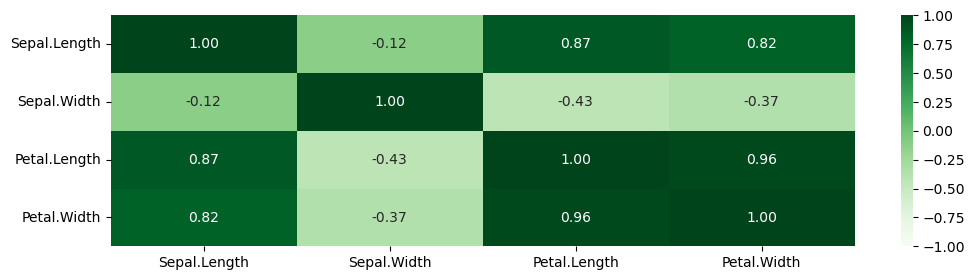

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,3))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens', fmt='.2f')
plt.show()

- 특정 데이터 타입만 선택하거나 제외

In [10]:
iris.select_dtypes(include=object)

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [12]:
iris.select_dtypes(exclude=object)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
iris_SepalLength = iris['Sepal.Length']
iris_SepalLength.rolling(5).sum() # 인접한 5개의 합 국소적인 합계나 변환를 볼 때 사용

0       NaN
1       NaN
2       NaN
3       NaN
4      24.3
       ... 
145    32.9
146    32.3
147    33.0
148    32.4
149    31.6
Name: Sepal.Length, Length: 150, dtype: float64

In [14]:
iris_SepalLength.rolling(5).mean()

0       NaN
1       NaN
2       NaN
3       NaN
4      4.86
       ... 
145    6.58
146    6.46
147    6.60
148    6.48
149    6.32
Name: Sepal.Length, Length: 150, dtype: float64